<a href="https://colab.research.google.com/github/Priyanshi614/ML_SEM6_CE017/blob/main/ML_LAB05_CE017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [3]:
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)
Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)
Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)
print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temperature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temperature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
import numpy as np
import torch

inputs = []
output = []

for i in range(len(Play_encoded)):
  temp = [Outlook_encoded[i], Temperature_encoded[i], Humidity_encoded[i], Wind_encoded[i]]
  output.append(Play_encoded[i])
  inputs.append(temp)

inputs = np.array(inputs)
inputs, output



(array([[1, 1, 0, 0],
        [1, 1, 0, 1],
        [0, 1, 0, 0],
        [2, 2, 0, 0],
        [2, 0, 1, 0],
        [2, 0, 1, 1],
        [0, 0, 1, 1],
        [1, 2, 0, 0],
        [1, 0, 1, 0],
        [2, 2, 1, 0],
        [1, 2, 1, 1],
        [0, 2, 0, 1],
        [0, 1, 1, 0],
        [2, 2, 0, 1]]), [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split
df_names = ['Outlook','Temperature','Humidity','Wind']
X_train, X_test, y_train, y_test = train_test_split(inputs, output, train_size = 0.75)


In [6]:
from sklearn import tree
from sklearn import metrics
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [7]:
y_predicted = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted) *100,"%")
print("Precision:",metrics.precision_score(y_test,y_predicted) *100,"%")
print("Recall:",metrics.recall_score(y_test,y_predicted) *100,"%")
print("F1 score:",metrics.f1_score(y_test,y_predicted) *100,"%")

Accuracy: 75.0 %
Precision: 100.0 %
Recall: 75.0 %
F1 score: 85.71428571428571 %


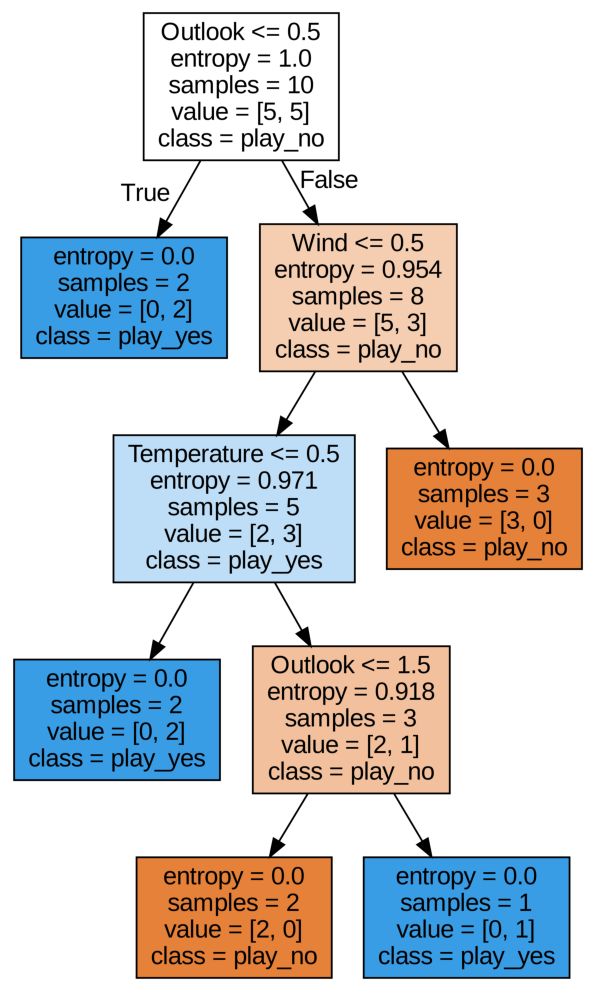

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(model,out_file='tree_entropy.dot',feature_names=['Outlook','Temperature','Humidity','Wind'],
class_names=['play_no','play_yes'],filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

In [9]:
ans = model.predict([[1,2,1,0],[2,0,0,1]])
print(ans[0] and 'Yes\n' or 'No\n')
print(ans[1] and 'Yes' or 'No')

No

No


In [10]:
from sklearn.datasets import load_iris
iris= load_iris()

X = iris.data
y = iris.target

X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [11]:
from sklearn.model_selection import train_test_split

data_feature_names = iris.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9)

In [12]:
model = tree.DecisionTreeClassifier(criterion='entropy') 
model = model.fit(X_train, y_train)

from sklearn import metrics

y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test,y_pred,average='micro'))
print("F1 score:",metrics.f1_score(y_test,y_pred,average='micro'))

Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1 score: 0.9333333333333333


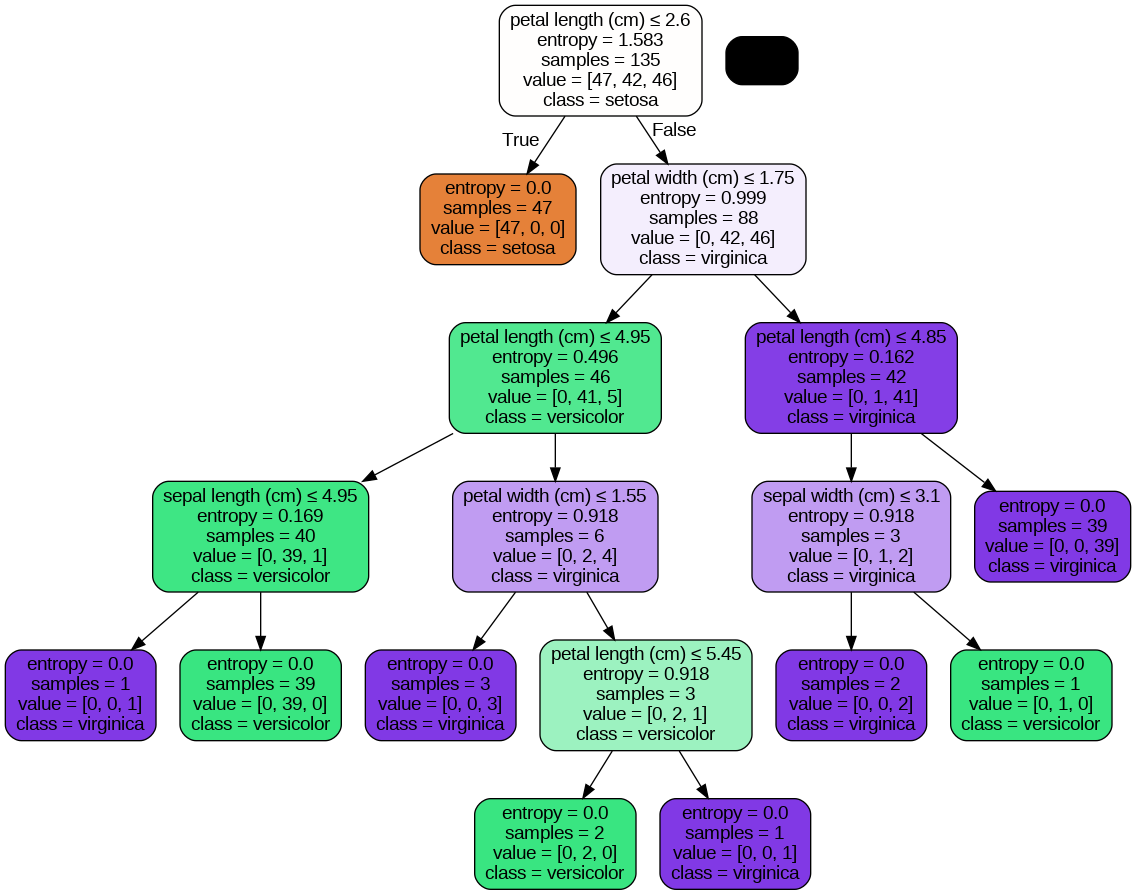

In [13]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_feature_names,class_names=['setosa','versicolor','virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

In [ ]:
path = model.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']
alphas

array([0.        , 0.01481481, 0.03542599, 0.03596113, 0.05075595,
       0.0604178 , 0.46182354, 0.92552578])

In [15]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Dataset2.csv')
print("\nData: \n",df)
print("\nData statistics\n",df.describe())


Data: 
    Outlook Temp Wind Humidity Class
0        R    H    F   Normal     N
1        R    H    T     High     N
2        O    H    F   Normal     Y
3        S    M    F   Normal     N
4        S    M    F   Normal     Y
5        S    M    T      Low     Y
6        O    C    T   Normal     Y
7        R    C    F   Normal     Y
8        R    C    F      Low     Y
9        S    M    F     High     Y
10       R    M    T     High     Y
11       O    M    T      Low     Y
12       O    H    F   Normal     Y
13       S    M    T   Normal     N

Data statistics
        Outlook Temp Wind Humidity Class
count       14   14   14       14    14
unique       3    3    2        3     2
top          R    M    F   Normal     Y
freq         5    7    8        8    10


In [16]:
dummies1 = pd.get_dummies(df.Outlook)
dummies2 = pd.get_dummies(df.Temp)
dummies3 = pd.get_dummies(df.Wind)
dummies4 = pd.get_dummies(df.Humidity)
merged = pd.concat([df,dummies1,dummies2,dummies3,dummies4],axis='columns')
final = merged.drop(['Outlook','Temp','Wind','Humidity'],axis='columns')
final

,Class,O,R,S,C,H,M,F,T,High,Low,Normal
0,N,0,1,0,0,1,0,1,0,0,0,1
1,N,0,1,0,0,1,0,0,1,1,0,0
2,Y,1,0,0,0,1,0,1,0,0,0,1
3,N,0,0,1,0,0,1,1,0,0,0,1
4,Y,0,0,1,0,0,1,1,0,0,0,1
5,Y,0,0,1,0,0,1,0,1,0,1,0
6,Y,1,0,0,1,0,0,0,1,0,0,1
7,Y,0,1,0,1,0,0,1,0,0,0,1
8,Y,0,1,0,1,0,0,1,0,0,1,0
9,Y,0,0,1,0,0,1,1,0,1,0,0


In [19]:
x = final.drop('Class',axis='columns')
y = final.Class

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
x, y, train_size = 0.7, random_state=14)
import numpy as np

model2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
print(pred)
accuracy = metrics.accuracy_score(y_test,pred)
precision=metrics.precision_score(y_test,pred,average=None)
recall = metrics.recall_score(y_test,pred,average=None)
print('Accuracy: {}'.format(accuracy))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

['N' 'Y' 'Y' 'Y' 'Y']
Accuracy: 0.2
precision: [0.   0.25]
recall: [0.  0.5]
